<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pyhtonday29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data_new.xlsx'

In [4]:
df = pd.read_excel(path)
df.head(21)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock
0,1,23,F,150,1,Satisfied with the service,Clothing,4
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86
2,3,45,F,800,0,Regular customer,Books,24
3,4,52,M,200,0,Occasional buyer,Beauty,10
4,5,29,F,300,1,High spender,Books,47
5,6,41,M,450,0,Average experience,Books,86
6,7,38,F,670,1,Prefers online shopping,Home Goods,69
7,8,27,M,120,1,New customer,Home Goods,0
8,9,50,F,500,0,Loyal to the brand,Electronics,86
9,10,33,M,750,1,High conversion rate,Clothing,45


In [5]:
conversion_rate = df['Converted'].mean() * 100
print(f'Overall Conversion Rate: {conversion_rate:.2f}%')

Overall Conversion Rate: 60.00%


In [6]:
total_spent_by_category = df.groupby('Purchased Category')['Total Spent'].sum()
print(total_spent_by_category)

Purchased Category
Beauty         1200
Books          2350
Clothing       1600
Electronics    1680
Home Goods     2090
Name: Total Spent, dtype: int64


In [7]:
high_spending_customers = df[df['Total Spent'] > 500]
print(high_spending_customers[['Customer ID','Total Spent']])

    Customer ID  Total Spent
1             2          600
2             3          800
6             7          670
9            10          750
10           11          610
14           15          510
16           17          550
17           18          700


In [10]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_analysis = df.groupby('Age Group').agg({
    'Total Spent': 'mean',
    'Converted': 'mean'
}).rename(columns={'Total Spent': 'Average Spent', 'converted': 'Conversion Rate'})

print(age_group_analysis)

           Average Spent  Converted
Age Group                          
18-30         268.333333   0.833333
31-40         594.285714   0.857143
41-50         491.666667   0.166667
51-60         200.000000   0.000000


<ipython-input-10-f6b2b613edf1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df.groupby('Age Group').agg({


In [13]:
low_stock_categories = df[df['Stock'] < 20].groupby('Purchased Category')['Stock'].sum()
print(low_stock_categories)

Purchased Category
Beauty         10
Clothing        4
Electronics    13
Home Goods      0
Name: Stock, dtype: int64


In [14]:
conversion_by_gender = df.groupby('Gender')['Converted'].mean() * 100
print(conversion_by_gender)

Gender
F    63.636364
M    55.555556
Name: Converted, dtype: float64


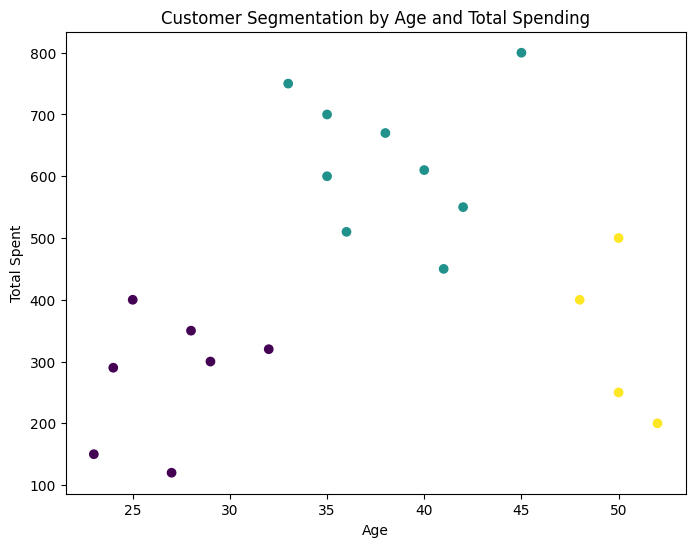

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


features = df[['Age', 'Total Spent']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Total Spent'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Customer Segmentation by Age and Total Spending')
plt.show()


In [16]:
print(df[['Customer ID', 'Age', 'Total Spent', 'Cluster']].head())

   Customer ID  Age  Total Spent  Cluster
0            1   23          150        0
1            2   35          600        1
2            3   45          800        1
3            4   52          200        2
4            5   29          300        0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


x = df[['Age']]
y = df['Total Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse =mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 40246.94


In [19]:
print(f'Coefficient: {model.coef_[0]:.2f}')

Coefficient: 3.42


In [20]:
print(f'Intercept: {model.intercept_:.2f}')

Intercept: 314.25


Sentiment
Positive    9
Neutral     8
Negative    3
Name: count, dtype: int64


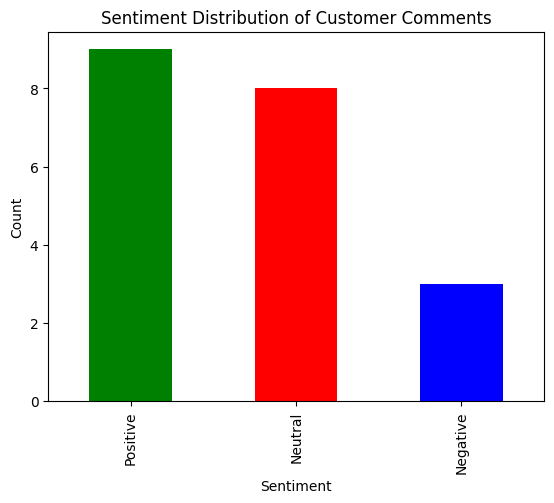

In [26]:
from textblob import TextBlob


def get_sentiment(comment):
     analysis = TextBlob(comment)
     return analysis.sentiment.polarity



df['Sentiment Score'] = df['Comments'].apply(get_sentiment)


df['Sentiment'] = df['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Customer Comments')
plt.show()

In [34]:
critical_stock_level = 20

df['Critical Stock'] = ['Stock'] * len(df)

critical_stock_summary = df.groupby('Purchased Category')['Critical Stock'].sum()
print(critical_stock_summary)

critical_stock_summary.plot(kind='bar', color='orange')
plt.xlabel('Purchased Category')
plt.ylabel('Number of Products in Critical Stock')
plt.title('Critical Stock Levels by Category')
plt.show()

Purchased Category
Beauty                   StockStockStock
Books          StockStockStockStockStock
Clothing                 StockStockStock
Electronics         StockStockStockStock
Home Goods     StockStockStockStockStock
Name: Critical Stock, dtype: object


TypeError: no numeric data to plot

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

pivot_table = df.pivot_table(index='Customer ID', columns='Purchased Category', values='Total Spent', fill_value=0)

similarity_matrix = cosine_similarity(pivot_table)


similarity_df = pd.DataFrame(similarity_matrix, index=pivot_table.index, columns=pivot_table.index)

def recommend_similar_customers(customer_id, top_n=3):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:top_n+1]
    return similar_customers


recommended_customers = recommend_similar_customers(1)
print(recommended_customers)

Customer ID
18    1.0
10    1.0
12    0.0
Name: 1, dtype: float64
